# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [143]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

### 1. Checking dataset

In [144]:
# Checking dataset
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [145]:
# Cheking shape
penguins_df.shape

(344, 5)

In [146]:
# Checking data type of each column
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [147]:
# Checking missing values
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [148]:
# Checking outliers
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


There are only some missing values in 5 columns and some outliers in 'flipper_length_mm' column. So I am going to remove them from the dataset

### 2. Removing missing values and outliers

In [149]:
# Removing missing values
penguins_clean = penguins_df.dropna()

In [150]:
# Checking missing values again
penguins_clean.isna().sum()

# Checking shape
penguins_clean.shape

(335, 5)

<AxesSubplot: >

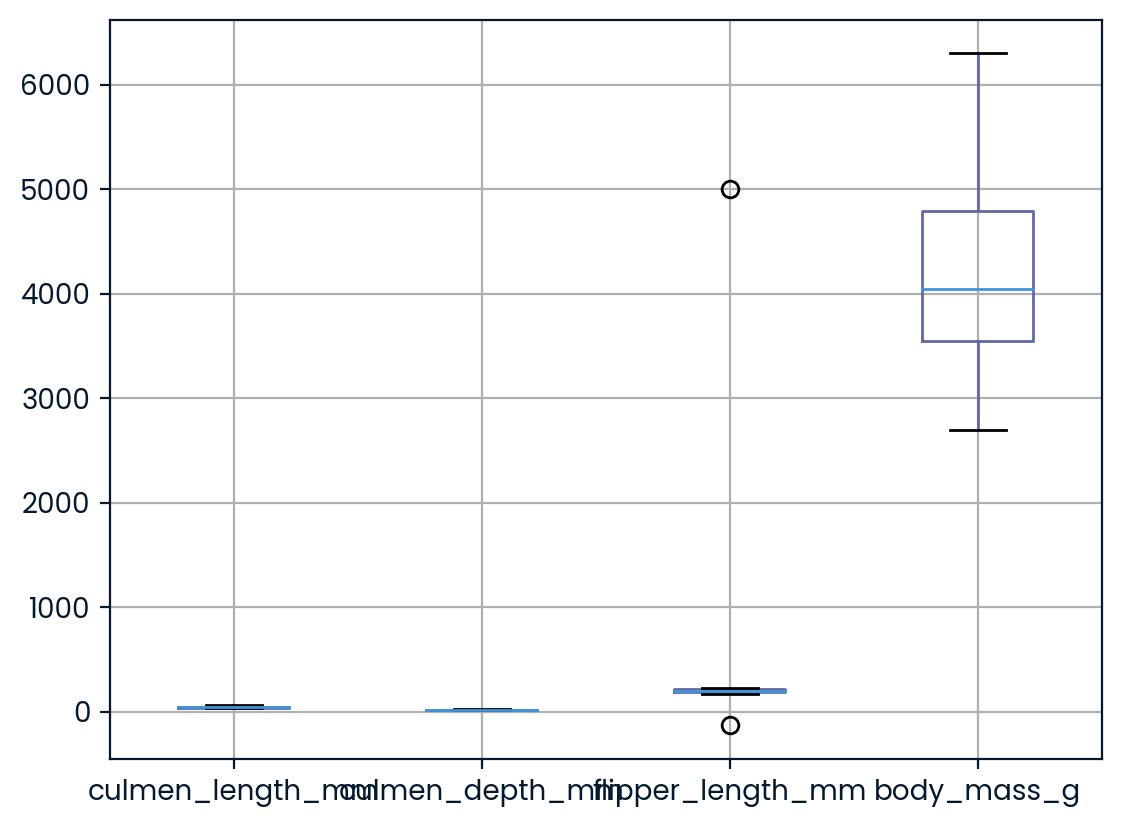

In [151]:
# Creating a box plot to show outliers
penguins_clean.boxplot()

There are 2 outliers in the 'flipper_length_mm' column which are over 1000 and under 0

In [152]:
# Removing outliers
penguins_clean = penguins_clean[(penguins_df['flipper_length_mm'] < 1000) & (penguins_clean['flipper_length_mm'] > 0)]
# Checking values of 'flipper_length_column' and new shape of dataset
print(penguins_clean['flipper_length_mm'].describe())
print(penguins_clean.shape)

count    333.000000
mean     201.024024
std       14.042299
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64
(333, 5)


### 3. Creating dummies for dataset

In [153]:
# Creating dummies variable
df = pd.get_dummies(penguins_clean).drop(columns='sex_.', axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


### 4. Scaling dataset

In [154]:
# Scaling data
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Putting scaled data into a Data Frame
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)

# Checking scaled data
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


### 5. Principal Component Analysis

In [155]:
# Finding explained variance ratio of all columns
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_

array([0.51973484, 0.34424041, 0.08591863, 0.03225427, 0.01686049,
       0.00099136])

In [156]:
# Choosing 2 highest explained variance ratio columns
n_components = sum(dfx_pca.explained_variance_ratio_>0.1)
n_components

2

In [157]:
# Perform PCA again with 2 components corresponding to 2 above columns
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
penguins_PCA[0:5,:]

array([[-0.72952069, -2.09719199],
       [-1.9293044 ,  0.4121497 ],
       [-1.95352479,  0.3084854 ],
       [-2.28817761, -0.15827773],
       [-0.62182165, -2.51402049]])

### 6. Finding the optimal number of clusters for k-means clustering

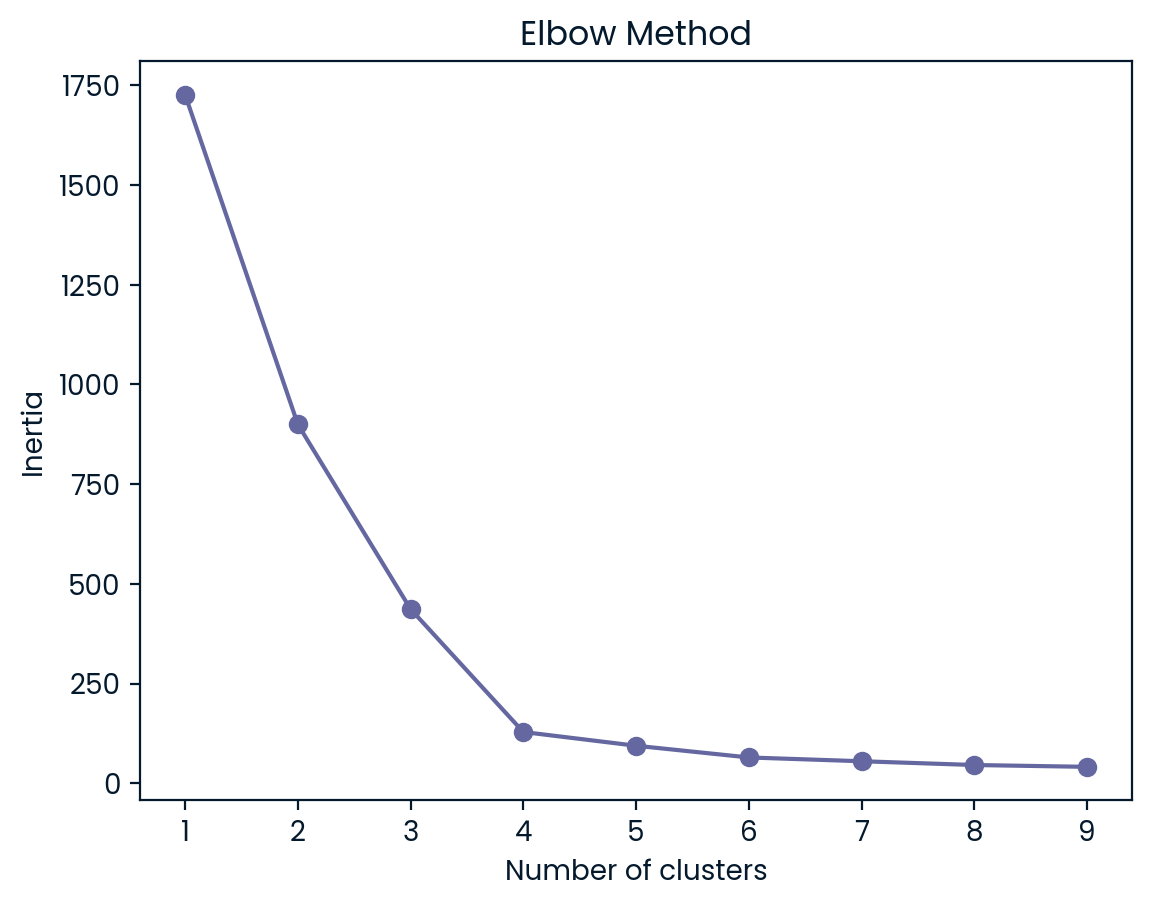

In [158]:
# Creating an empty list
inertia = []

# Finding the optimal clusters for the model
for cluster in range(1, 10):
    model = KMeans(n_clusters=cluster, random_state=42).fit(penguins_PCA)
    inertia.append(model.inertia_)

# Plotting inertia metric
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# n clusters
n_clusters = 4

As we can see on the plot, 4 clusters are optimal for the model

### 7. Running the K-Means clustering algorithm

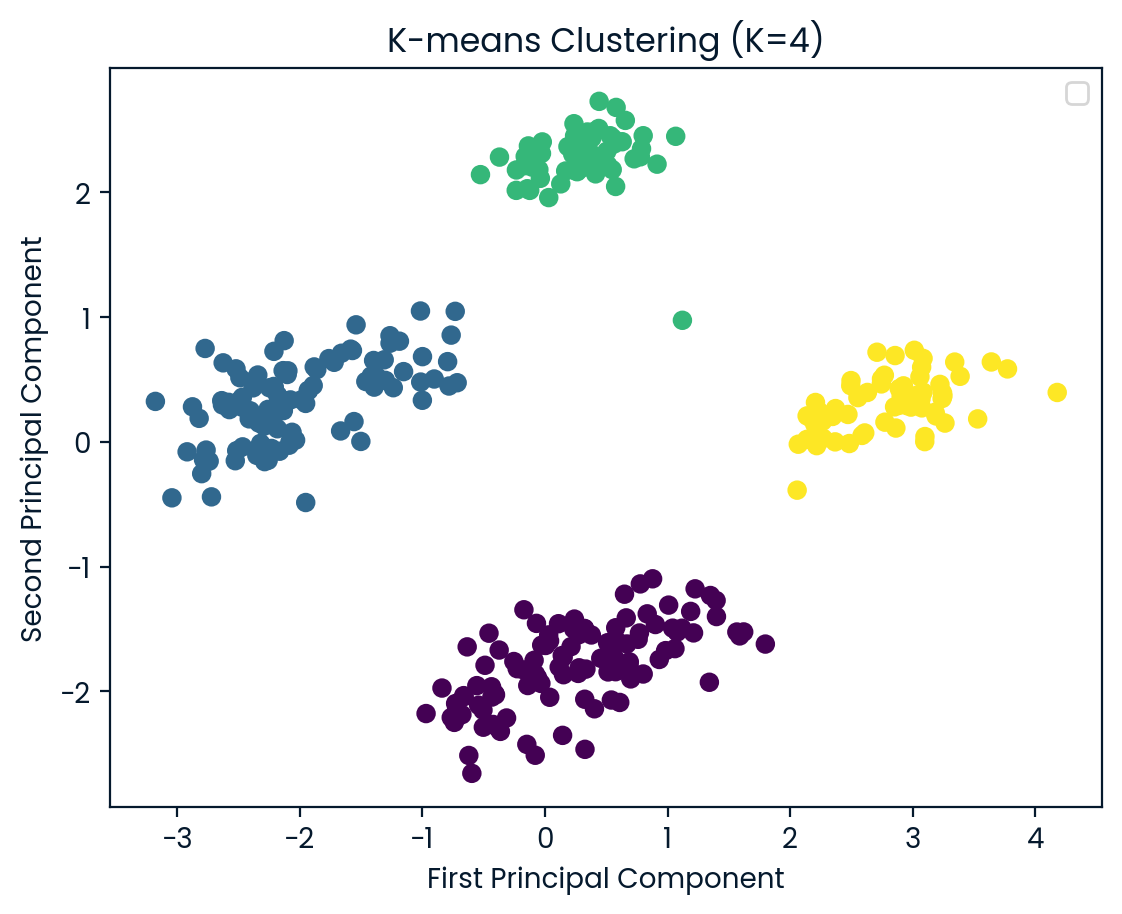

In [159]:
# KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(penguins_PCA)

# Plotting the resulting clusters
plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

### 8. Creating Data Frame for each cluster

In [160]:
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984
